# 버섯 식용/독성

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

mushrooms_df = pd.read_csv('mushrooms.csv')
mushrooms_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
print('\n ### train 데이터 정보 ###  \n')
print(mushrooms_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14

In [4]:
# 각 컬럼별 결측치 개수 출력
print(mushrooms_df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [5]:
print("전체 Null 값 개수:", mushrooms_df.isnull().sum().sum())

전체 Null 값 개수: 0


## 트리, 랜덤포레스트, 로지스틱 모델 비교

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def print_clf_eval(y_test, pred, model_name=''):
    print(f'\n📊 {model_name} 성능 평가 결과')
    print('오차 행렬:\n', confusion_matrix(y_test, pred))
    print('정확도 (Accuracy): {:.4f}'.format(accuracy_score(y_test, pred)))
    print('정밀도 (Precision): {:.4f}'.format(precision_score(y_test, pred)))
    print('재현율 (Recall): {:.4f}'.format(recall_score(y_test, pred)))
    print('F1 점수 (F1 Score): {:.4f}'.format(f1_score(y_test, pred)))


In [8]:
# 문자형 → 숫자형 변환 (Label Encoding)
label_encoder = LabelEncoder()
for col in mushrooms_df.columns:
    mushrooms_df[col] = label_encoder.fit_transform(mushrooms_df[col])

# 데이터/레이블 분리
X = mushrooms_df.drop("class", axis=1)
y = mushrooms_df["class"]

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# 모델 정의
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')  # 작은 데이터에 적합

# 결정 트리 학습/예측
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 랜덤 포레스트 학습/예측
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 로지스틱 회귀 학습/예측
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 1.0000
RandomForestClassifier 정확도: 1.0000
LogisticRegression 정확도: 0.9385


In [9]:
print_clf_eval(y_test, dt_pred, 'DecisionTreeClassifier')
print_clf_eval(y_test, rf_pred, 'RandomForestClassifier')
print_clf_eval(y_test, lr_pred, 'LogisticRegression')



📊 DecisionTreeClassifier 성능 평가 결과
오차 행렬:
 [[859   0]
 [  0 766]]
정확도 (Accuracy): 1.0000
정밀도 (Precision): 1.0000
재현율 (Recall): 1.0000
F1 점수 (F1 Score): 1.0000

📊 RandomForestClassifier 성능 평가 결과
오차 행렬:
 [[859   0]
 [  0 766]]
정확도 (Accuracy): 1.0000
정밀도 (Precision): 1.0000
재현율 (Recall): 1.0000
F1 점수 (F1 Score): 1.0000

📊 LogisticRegression 성능 평가 결과
오차 행렬:
 [[814  45]
 [ 55 711]]
정확도 (Accuracy): 0.9385
정밀도 (Precision): 0.9405
재현율 (Recall): 0.9282
F1 점수 (F1 Score): 0.9343


## 트리 시각화

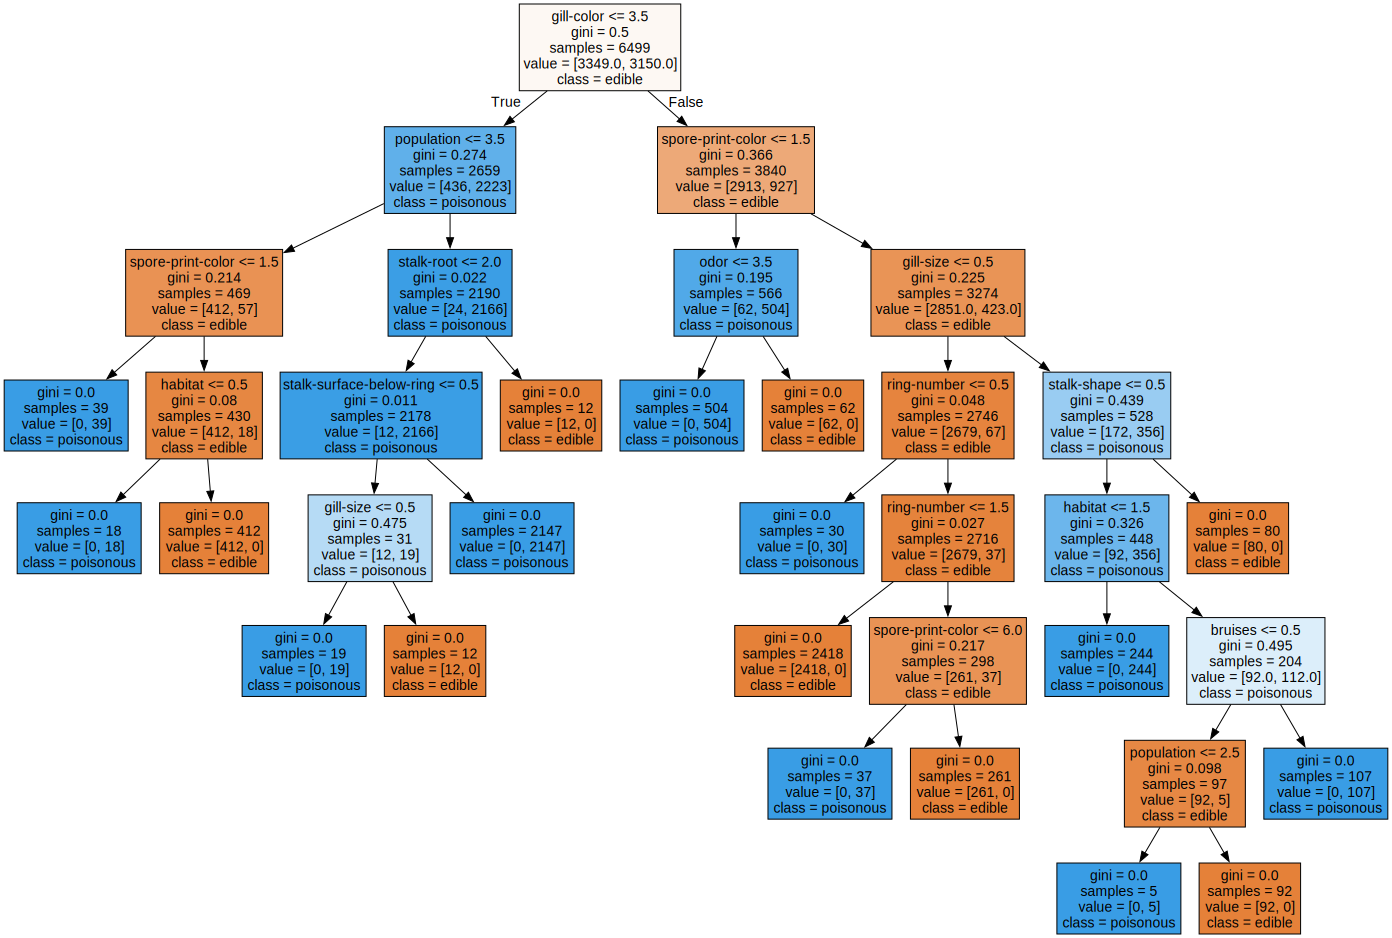

In [11]:
from sklearn.tree import export_graphviz
import graphviz

# class_names는 0 = edible, 1 = poisonous
class_names = ['edible', 'poisonous']

# feature_names는 학습 데이터의 컬럼 리스트
feature_names = X.columns.tolist()

# DOT 파일 생성
export_graphviz(dt_clf, out_file="mushroom.dot",
                class_names=class_names,
                feature_names=feature_names,
                impurity=True, filled=True)

# DOT 파일을 바로 그래프로 출력
with open("mushroom.dot") as f:
    dot_graph = f.read()

# Jupyter 환경에서 시각화
graphviz.Source(dot_graph)


## xgboost 모델

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import numpy as np

# 데이터 로딩
mushrooms_df = pd.read_csv("mushrooms.csv")

# 라벨 인코딩 (모든 컬럼이 문자열이라 전부 인코딩 필요)
label_encoder = LabelEncoder()
for col in mushrooms_df.columns:
    mushrooms_df[col] = label_encoder.fit_transform(mushrooms_df[col])

# Feature / Label 나누기
X_features = mushrooms_df.iloc[:, 1:]  # 첫 컬럼 'class'가 label
y_label = mushrooms_df.iloc[:, 0]      # 'class' 컬럼


In [14]:


# 학습 데이터 -> 학습/검증
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)


(6499, 22) (1625, 22)
(5849, 22) (650, 22)


In [15]:
# DMatrix 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# 파라미터 설정
params = {
    'max_depth': 3,
    'eta': 0.05,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 400
eval_list = [(dtr, 'train'), (dval, 'eval')]

# 학습
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds,
                      early_stopping_rounds=50, evals=eval_list)


[0]	train-logloss:0.65037	eval-logloss:0.65119
[1]	train-logloss:0.61216	eval-logloss:0.61300
[2]	train-logloss:0.57743	eval-logloss:0.57830
[3]	train-logloss:0.54574	eval-logloss:0.54663
[4]	train-logloss:0.51673	eval-logloss:0.51765
[5]	train-logloss:0.49006	eval-logloss:0.49059
[6]	train-logloss:0.46542	eval-logloss:0.46599
[7]	train-logloss:0.44270	eval-logloss:0.44329
[8]	train-logloss:0.42163	eval-logloss:0.42189
[9]	train-logloss:0.40207	eval-logloss:0.40232
[10]	train-logloss:0.38390	eval-logloss:0.38420
[11]	train-logloss:0.36696	eval-logloss:0.36697
[12]	train-logloss:0.35115	eval-logloss:0.35105
[13]	train-logloss:0.33641	eval-logloss:0.33602
[14]	train-logloss:0.32053	eval-logloss:0.31995
[15]	train-logloss:0.30570	eval-logloss:0.30502
[16]	train-logloss:0.29187	eval-logloss:0.29097
[17]	train-logloss:0.27896	eval-logloss:0.27800
[18]	train-logloss:0.26687	eval-logloss:0.26571
[19]	train-logloss:0.25557	eval-logloss:0.25421
[20]	train-logloss:0.24499	eval-logloss:0.24353
[2

In [16]:
# 예측 확률
pred_probs = xgb_model.predict(dtest)
print('예측 확률 값 10개:', np.round(pred_probs[:10], 3))

# 확률 -> 이진 클래스(0 또는 1)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측 클래스 10개:', preds[:10])


예측 확률 값 10개: [1.    0.    0.    1.    0.003 0.    0.004 0.    0.001 0.   ]
예측 클래스 10개: [1, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, preds, pred_probs)


오차 행렬
[[859   0]
 [  0 766]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000,    F1: 1.0000, AUC:1.0000


In [18]:
models = ['DecisionTree', 'RandomForest', 'LogisticRegression', 'XGBoost']
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

def get_metrics(y_true, y_pred, y_proba):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'auc': roc_auc_score(y_true, y_proba)
    }

# Decision Tree
dt_metrics = get_metrics(y_test, dt_pred, dt_clf.predict_proba(X_test)[:,1])
# Random Forest
rf_metrics = get_metrics(y_test, rf_pred, rf_clf.predict_proba(X_test)[:,1])
# Logistic Regression
lr_metrics = get_metrics(y_test, lr_pred, lr_clf.predict_proba(X_test)[:,1])
# XGBoost
xgb_metrics = get_metrics(y_test, preds, pred_probs)

for m in [dt_metrics, rf_metrics, lr_metrics, xgb_metrics]:
    accuracy_list.append(m['accuracy'])
    precision_list.append(m['precision'])
    recall_list.append(m['recall'])
    f1_list.append(m['f1'])
    auc_list.append(m['auc'])


In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc

# 한글 폰트 설정 (윈도우 기본: Malgun Gothic)
font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False


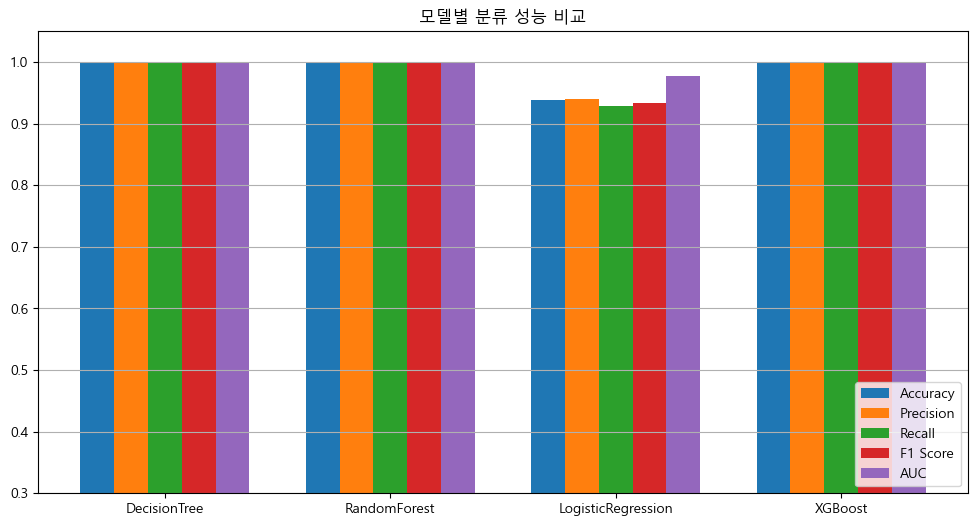

In [20]:
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.15
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
plt.bar(index, accuracy_list, bar_width, label='Accuracy')
plt.bar(index + bar_width, precision_list, bar_width, label='Precision')
plt.bar(index + bar_width*2, recall_list, bar_width, label='Recall')
plt.bar(index + bar_width*3, f1_list, bar_width, label='F1 Score')
plt.bar(index + bar_width*4, auc_list, bar_width, label='AUC')

plt.xticks(index + bar_width*2, models)
plt.ylim(0.3, 1.05)
plt.title('모델별 분류 성능 비교')
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()


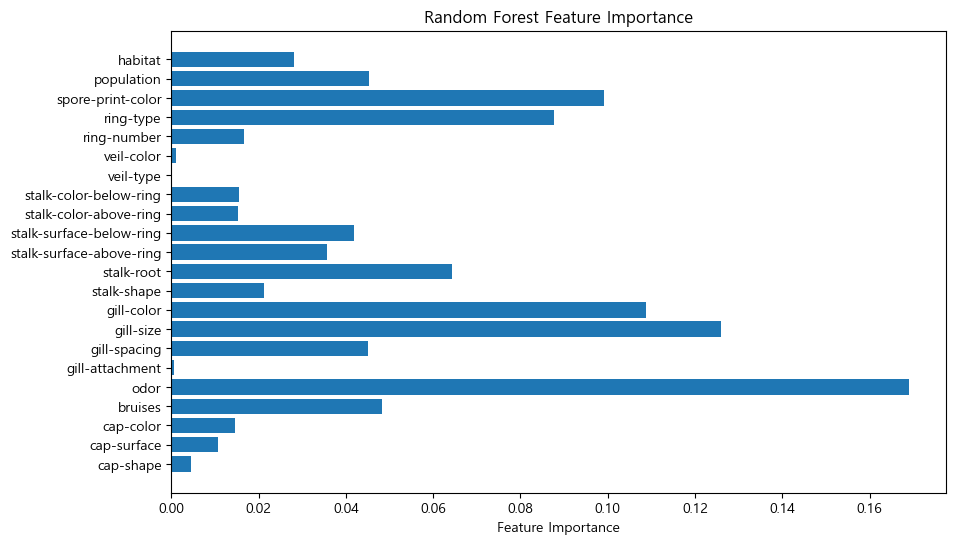

In [21]:
importances = rf_clf.feature_importances_
features = X_features.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(np.arange(len(importances)), features)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


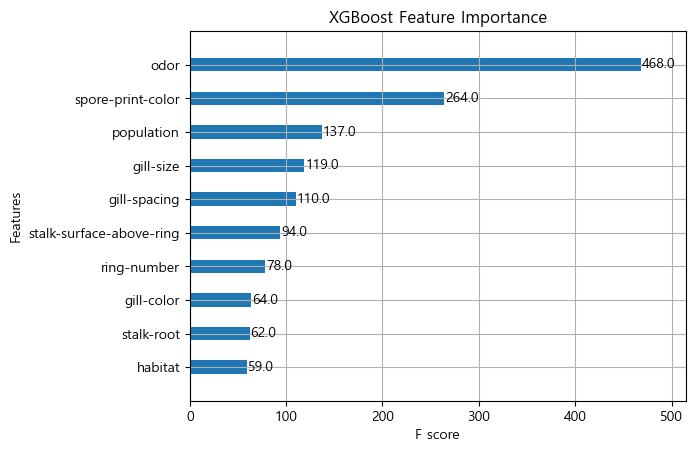

In [22]:
xgb.plot_importance(xgb_model, max_num_features=10, height=0.4)
plt.title("XGBoost Feature Importance")
plt.show()


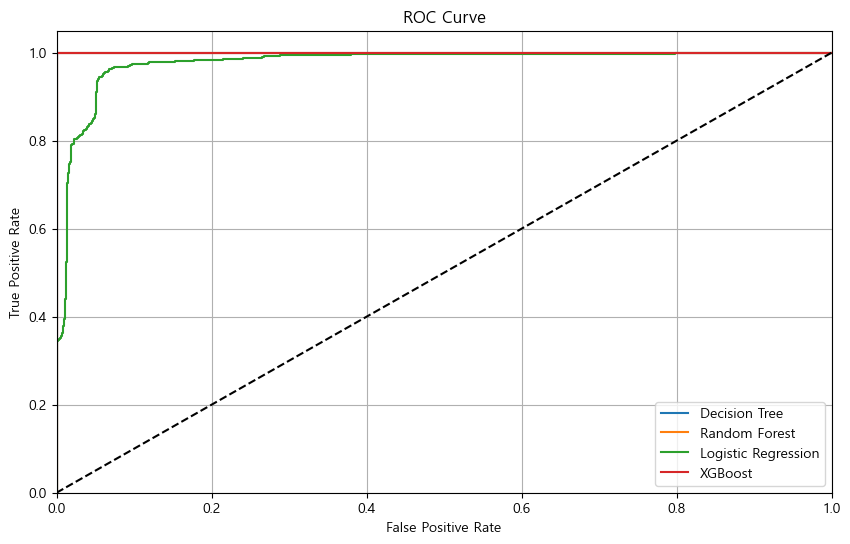

In [23]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

# DecisionTree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_clf.predict_proba(X_test)[:,1])
# RandomForest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
# LogisticRegression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_clf.predict_proba(X_test)[:,1])
# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, pred_probs)

plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')

plt.plot([0,1],[0,1],'k--') # 대각선
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
